# Title: "Comparative study for different clustring algorithms on the Online retail dataset 2"

---------------------------------------------------------------------------------------------------------------------------

![Elzob.png](https://i.ibb.co/fvm1cGV/ElzobV2.png)

This notebook is part of our Graduation project **Elzoboon** under supervision of Prof. Dr. *Walaa H.Ashmawi*

**Dataset**: we have used Online Retail II data set from the UCI machine learning open source dataset. it contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. <br />

**Attribute Information**:<br />
*InvoiceNo*: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.  <br />
*StockCode*: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.  <br />
*Description*: Product (item) name. Nominal.  <br />
*Quantity*: The quantities of each product (item) per transaction. Numeric.  <br />
*InvoiceDate*: Invice date and time. Numeric. The day and time when a transaction was generated. <br />
*UnitPrice*: Unit price. Numeric. Product price per unit in sterling (Â£).  <br />
*CustomerID*: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.  <br />
*Country*: Country name. Nominal. The name of the country where a customer resides.

 [Data set link](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II)


<a class="anchor" id="table_of_content"></a>

# Table of content 
* [1. Imports](#Imports)
    * [1.1 Libraries ](#Libraries_1_1)
    * [1.2 Reading data ](#reading_data_1_2)

* [2. Data cleaning](#data_cleaning)
    * [2.1 Removing null values](#removing_null_values_2_1)
    * [2.2 Removing negative values](#removing_negative_values_2_2)
    * [2.3 Fromat description](#format_description_2_3)
    * [2.4 Removing inconsistency of description](#removing_inconsistency_of_descriptions_2_4)
    * [2.5 Removing null prices](#remove_null_prices)
    * [2.6 Removing outliers](#removing_outliers_2_6)

* [3. RFM score](#rfm_score)
    * [3.1 RFM for each customer](#rfm_for_each_customer_3_1)
    * [3.2 Standard scaling for RFM values](#standard_scaling_for_rfm_values_3_2)

* [4. Machine learning](#machine_learning)
    * [4.1 K-means](#k_means_4_1)
        * [4.1.1 Elbow method](#elbow_method_4_1_1)
        * [4.1.2 Model training](#model_training_4_1_2)
        * [4.1.3 Save result](#save_restult_4_1_3)
        * [4.1.4 Visualization of clusters](#visualization_of_clusters_4_1_4)
        * [4.1.5 Interactive visualization](#interactive_visualization_4_1_5)
        * [4.1.6 Visualization of cluster in 2D](#visualization_of_cluster_in_2d_4_1_6)
        * [4.1.7 Evaluation mtrics](#evaluation_metrics_4_1_7)
        
    * [4.2 SOM (Slef-organizing map)](#SOM_self_organizing_map)
        * [4.2.1 model training](#model_training_4_2_1)
        * [4.2.2 Model training](#visualization_4_2_2)
        * [4.2.3 Evaulation metrics](#evaulation_metrics_4_2_3)

    * [4.3 hierarchical clustring](#hierarchical_clustring)
        * [4.3.1 Single linkage](#single_linkage_4_3_1)
        * [4.3.2 Complete linkage](#complete_linkage_4_3_2)
        * [4.3.3 Average linkage](#average_linkage_4_3_3)
        * [4.3.4 Visualizations](#average_linkage_4_3_4)
        * [4.3.5 Evaulation metrics](#evaluation_metrics_4_3_5)

* [5. Theory](#theory)
    * [5.1 RFM](#rfm_5_1)
    * [5.2 K-means](#k_means_5_2)
    * [5.3 SOM](#SOM_5_3)
    * [5.4 Heirarchical clustring](#heirarchical_clustring_5_4)
    * [5.5 Evaluation](#evaluation_5_5)
        * [5.5.1 Silhouette coefficient](#silhouette_coefficient_5_5_1)
        * [5.5.2 Calinski harabasz score](#calinski_harabasz_score_5_5_2)
 
    
    
    




<a class="anchor" id="Imports"></a>
# 1. Imports  [*](#table_of_content)

<a class="anchor" id="Libraries_1_1"></a>
## 1.1 Libraries  [*](#table_of_content)

In [574]:
                                            #---- Data warehousing ----#
#                                                 ----------------
#-----
import pandas as pd #reading and writing csv files  
import numpy as np # dealing with arrays 
import seaborn as sns # for advanced graphs 
import matplotlib.pyplot as plt # for traditional graphs 
import plotly.graph_objects as go # -- 
from plotly.offline import init_notebook_mode, iplot # -- 
import plotly.express as px # -- plotly for interactive graphs 
from sklearn.preprocessing import StandardScaler # for data scaling 


                                            #---- Machine learning ----#
#                                                 ----------------
# -- K-means -- #
from yellowbrick.cluster import KElbowVisualizer # -- for using the number of k 
from sklearn.cluster import KMeans # Kmeans machine learning model 

# -- SOM -- #
from minisom import MiniSom # SOM machine learning model 
from scipy import stats # -- 
from mpl_toolkits import mplot3d # --
import datetime as dt # convert date string into datetime object 
 
# -- Hierarchical -- #
from scipy.cluster.hierarchy import linkage # Hierarchical machine learning model 
from scipy.cluster.hierarchy import dendrogram # visualizing the clusters
from scipy.cluster.hierarchy import cut_tree # creating clustres
 
# -- Evaluation techniques -- #
from sklearn.metrics import silhouette_score # evaluation metric for clustring 
from sklearn.metrics import calinski_harabasz_score # evaluation metric for clustring

# draw matplotlib graphs inline 
%matplotlib inline
sns.set_style("whitegrid") # configuration for seaborn library

<a class="anchor" id="reading_data_1_2"></a>
## 1.2 Reading data  [*](#table_of_content)

In [575]:
# Reading data from an online source;
#df = pd.read_csv("https://raw.githubusercontent.com/julienjta/Data-Science-Portfolio/main/Project%203/data/data.csv",encoding = 'unicode_escape') 

# Reading data from local file
df = pd.read_csv("clean_data.csv",encoding = 'unicode_escape') 
# print the number of rows and cols 
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))
# print the table head
df.head()

There are 501132 observations for 11 predictors.


,Unnamed: 0.1,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,0,0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


---------------------------------------------------------------------------------------------------------------------------

<a class="anchor" id="data_cleaning"></a>
# 2. Data cleaning  [*](#table_of_content)

<a class="anchor" id="removing_null_values_2_1"></a>
## 2.1 Removing Null values  [*](#table_of_content)

In [576]:
df.isnull().sum() #number of null values in the dataset

Unnamed: 0.1         0
Unnamed: 0           0
InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      123008
Country              0
TotalPrice           0
dtype: int64

In [577]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]) # convert string to datetime object

# removing transactions from last month of the year 12/2011
df = df[(df["InvoiceDate"].dt.year!=2011)|(df["InvoiceDate"].dt.month!=12)] 

In [578]:
df[df.isin(["NaN","missing","?","??"]).any(axis=1)].shape[0] # number of missing values in the dataset 

0

In [579]:
df = df[df.isin(["NaN","missing","?","??"]).any(axis=1) == False] # remove missing values from the dataset

<a class="anchor" id="removing_negative_values_2_2"></a>
## 2.2 Removing negative values  [*](#table_of_content)

In [580]:
df[df['Quantity'] < 0].shape[0]# number of missing values in the dataset 

7943

In [581]:
df[df['UnitPrice'] < 0].shape[0]# number of missing values in the dataset 

0

In [582]:
df = df[df['Quantity'] > 0]# number of missing values in the dataset 

<a class="anchor" id="format_description_2_3"></a>
## 2.3 Format description  [*](#table_of_content)

In [583]:
df["Description"].nunique() # number of unique values 

3770

In [584]:
df["Description"].str.lower().str.strip().nunique() # make it all lowercase 

3770

In [585]:
df["Description"] = df["Description"].str.lower().str.strip() #remove spaces from the string 

In [586]:
# some descriptions are just fees and not items. We can delete them.
df = df[df["Description"].isin(["amazon fee", "samples", "postage", "packing charge","manual","discount","adjust bad debt","bank charges","cruk commission","next day carriage"]) == False]

<a class="anchor" id="removing_inconsistency_of_descriptions_2_4"></a>
## 2.4 Remove inconsistency of descriptions  [*](#table_of_content)

In [ ]:
df["Description"].nunique()

In [ ]:
df["StockCode"].nunique()

In [ ]:
df.groupby("StockCode")["Description"].nunique().sort_values(ascending = False) #number of each stock code value 

In [ ]:
for stack_code in df["StockCode"].unique():
    first_description = df[df["StockCode"]==stack_code]["Description"].unique()[0] # get first description 
    df.loc[df["StockCode"]==stack_code, "Description"] = first_description # set first description to all instances

In [252]:
df.groupby("Description")["StockCode"].nunique().sort_values(ascending = False)

Description
*boombox ipod classic               1
poppy's playhouse livingroom        1
polyester filler pad 45x30cm        1
polyester filler pad 45x45cm        1
polyester filler pad 60x40cm        1
                                   ..
french blue metal door sign 3       1
french blue metal door sign 4       1
french blue metal door sign 5       1
french blue metal door sign 6       1
zinc wire sweetheart letter tray    1
Name: StockCode, Length: 3770, dtype: int64

In [253]:
for description in df["Description"].unique():
    first_code = df[df["Description"]==description]["StockCode"].unique()[0]
    df.loc[df["Description"]==description, "StockCode"] = first_code

In [254]:
df["StockCode"].unique().shape

(3770,)

In [255]:
print(df.StockCode.nunique())
print(df.Description.nunique())

3770
3770


<a class="anchor" id="remove_null_prices"></a>
## 2.5 Remove null prices  [*](#table_of_content)

In [256]:
# Delete null price and quantities
df = df[(df["UnitPrice"]!=0)&(df["Quantity"]!=0)]

<a class="anchor" id="removing_outliers_2_6"></a>
## 2.6 Remove outliers  [*](#table_of_content)

<AxesSubplot:ylabel='TotalPrice'>

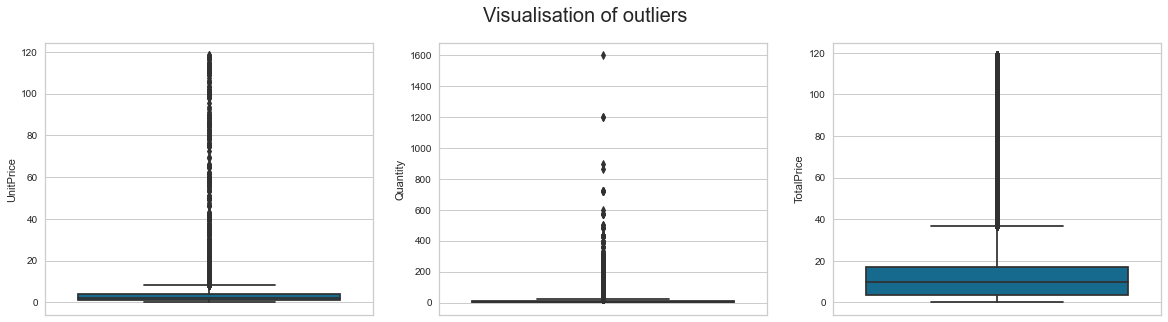

In [257]:
df["TotalPrice"] = df["Quantity"]*df["UnitPrice"]

fig = plt.figure(figsize = (20,5))
fig.suptitle("Visualisation of outliers",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.boxplot(data=df,y="UnitPrice")

axes = fig.add_subplot(1, 3, 2)
sns.boxplot(data=df,y="Quantity")

axes = fig.add_subplot(1, 3, 3)
sns.boxplot(data=df,y="TotalPrice")

In [258]:
df = df[(np.abs(stats.zscore(df[["TotalPrice"]])) < 3).all(axis=1)]

In [259]:
df.shape

(479616, 11)

---------------------------------------------------------------------------------------------------------------------------

<a class="anchor" id="rfm_score"></a>
# 3. RFM score  [*](#table_of_content)


In [587]:
today_date = dt.datetime(2011, 12, 1) # set a reference date 

<a class="anchor" id="rfm_for_each_customer_3_1"></a>
## 3.1 RFM for each customer  [*](#table_of_content)

In [588]:
## -- RFM scores values for each customer  -- 

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'    : 'nunique',
                                     'TotalPrice' : 'sum'})

rfm.columns = ['recency', 'frequency', 'monetary']

<a class="anchor" id="standard_scaling_for_rfm_values_3_2"></a>
## 3.2 Standard scaling for RFM values  [*](#table_of_content)

In [589]:
std_scaler = StandardScaler() # standard scaler object 
rfm_scaled = std_scaler.fit_transform(rfm) # scale values of rfm
rfm_scaled = pd.DataFrame(rfm_scaled,columns=['recency', 'frequency', 'monetary']) # create a dataframe object from rfm values
rfm_scaled["CustomerID"] = rfm.index # add column for customer id
rfm_scaled = rfm_scaled.set_index("CustomerID",drop=True) # make it as index

---------------------------------------------------------------------------------------------------------------------------

<a class="anchor" id="machine_learning"></a>
# 4. Machine learning [*](#table_of_content)


<a class="anchor" id="k_means_4_1"></a>
## 4.1 K-means  [*](#table_of_content)

<a class="anchor" id="elbow_method_4_1_1"></a>
### 4.1.1 Elbow method  [*](#table_of_content)

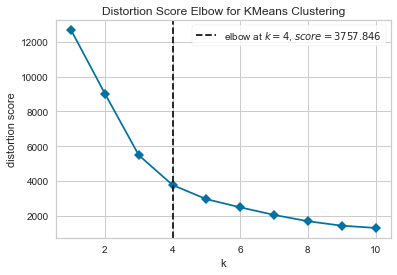

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [223]:
# Elbow method to determine number best number of K
model = KMeans() # k-means model 
visualizer = KElbowVisualizer(model, k=(1,11), timings= False) # EblowVisualizer object
visualizer.fit(rfm_scaled) # fit the data
visualizer.show() # show the graph 

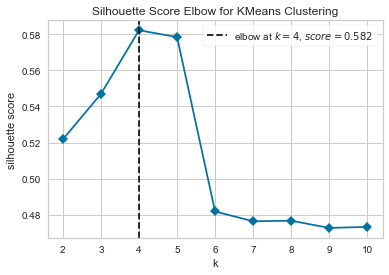

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [225]:
# Elbow method to determine number best number of K
model = KMeans() # k-means model 
visualizer = KElbowVisualizer(model, k=(2,11), timings= False, metric='silhouette') # EblowVisualizer object
visualizer.fit(rfm_scaled) # fit the data
visualizer.show() # show the graph 


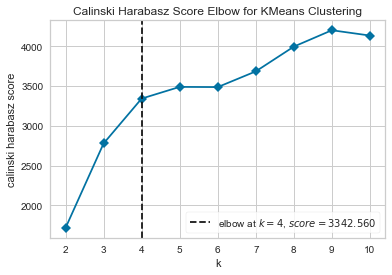

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [227]:
# Elbow method to determine number best number of K
model = KMeans() # k-means model 
visualizer = KElbowVisualizer(model, k=(2,11), timings= False, metric='calinski_harabasz') # EblowVisualizer object
visualizer.fit(rfm_scaled) # fit the data
visualizer.show() # show the graph 


<a class="anchor" id="model_training_4_1_2"></a>
### 4.1.2 Model training  [*](#table_of_content)

In [83]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(rfm_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(rfm_scaled) )

In [84]:
# get customer labels from the kmeans 
customer_labels_kmeans = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
# set type of col to categorical
customer_labels_kmeans['labels'] = customer_labels_kmeans['labels'].astype('category')

<a class="anchor" id="save_restult_4_1_3"></a>
### 4.1.3 Save result  [*](#table_of_content)

In [85]:
# add customer labels to the rfm dataframe
customer_labels = rfm
customer_labels['label'] = customer_labels_kmeans['labels'].values

In [86]:
# save dataframe as csv file
customer_labels.to_csv('customer_labels_new.csv')

<a class="anchor" id="visualization_of_clusters_4_1_4"></a>
### 4.1.4 Visualization of clusters  [*](#table_of_content)

In [87]:
rfm_kmeans = rfm.copy() # copy of the rfm table
rfm_kmeans['labels'] = customer_labels_kmeans['labels'].values # add labels to the rfm table

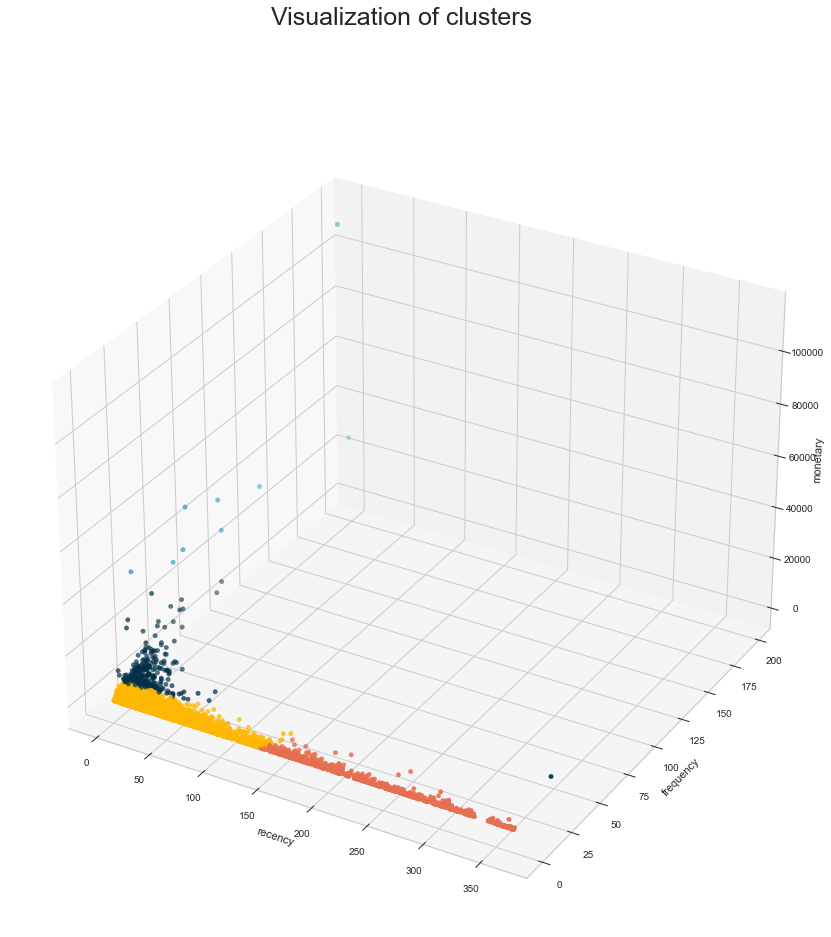

In [88]:
colors = np.array(["#ffb703", "#023047","#219ebc","#E76F51"]) # choose colors 
labels = np.array(kmeans.labels_)
fig = plt.figure(figsize = (15,15)).suptitle('Visualization of clusters', fontsize=25) # graph config
ax = plt.axes(projection='3d') # graph type 
# -- 3D scatter graph -- 
ax.scatter3D(rfm_kmeans["recency"], rfm_kmeans["frequency"], rfm_kmeans["monetary"], marker='o', c=colors[rfm_kmeans["labels"].tolist()], label = rfm_kmeans["labels"].tolist())

# axis configuration 
ax.set_xlabel('recency')
ax.set_ylabel('frequency')
ax.set_zlabel('monetary')
plt.show()

<a class="anchor" id="interactive_visualization_4_1_5"></a>
### 4.1.5 Interactive visualization  [*](#table_of_content)

In [89]:
colors = np.array(["#ffb703", "#023047","#219ebc","#E76F51"]) # choose colors 
labels = np.array(kmeans.labels_)
fig = px.scatter_3d(rfm_kmeans, x='recency', y='frequency', z='monetary',
              color=colors[rfm_kmeans["labels"].tolist()])

fig.show()

<a class="anchor" id="visualization_of_cluster_in_2d_4_1_6"></a>
### 4.1.6 Visualization of clusters in 2D  [*](#table_of_content)

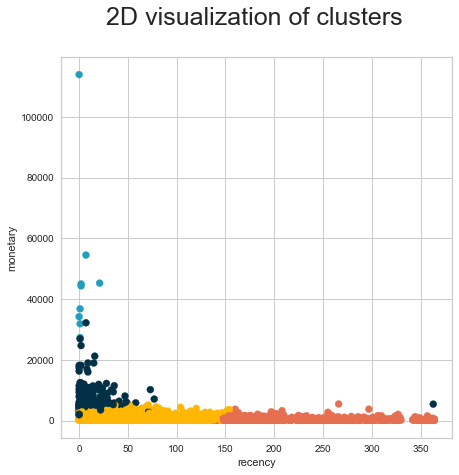

0       0
1       3
2       0
3       3
4       0
       ..
4222    3
4223    3
4224    0
4225    1
4226    0
Name: labels, Length: 4227, dtype: category
Categories (4, int64): [0, 1, 2, 3]


In [617]:
colors = np.array(["#ffb703", "#023047","#219ebc","#E76F51"]) # choose colors 
# orange, dark_blue, ligh_blue, red
fig = plt.figure(figsize = (7,7)).suptitle(' 2D visualization of clusters', fontsize=25) # graph config
ax = plt.axes() # graph type 
ax.scatter(rfm_kmeans["recency"], rfm_kmeans["monetary"], marker='o', c=colors[rfm_kmeans["labels"].tolist()])
ax.set_xlabel('recency')
ax.set_ylabel('monetary')
plt.show()
print(rfm_kmeans["labels"])

> 📌 From the KMeans clustering, we can sort every customer into 4 different clusters that seems to have different behaviours.
> - **Cluster 0**: " Recent customers" - Those are customers that have been active quite recently that might be interesting to keep stimulated.
> - **Cluster 1**: "Punctual customers" - Those are the customers that buys more punctually items on the website.
> - **Cluster 2**: "Exceptional customers" - Those are the customers that we want to keep, that buys at the highest frequency, the most recently and that spend the most money. 
> - **Cluster 3**: "Hibernating customers" - Those are the customers that buys at the lowest frequency, the lowest recently and that spend the least money.


> 
> The total distorsion score obtained is 4129 using the recency, the frequency and the monetary.

---------------------------------------------------------------------------------------------------------------------------

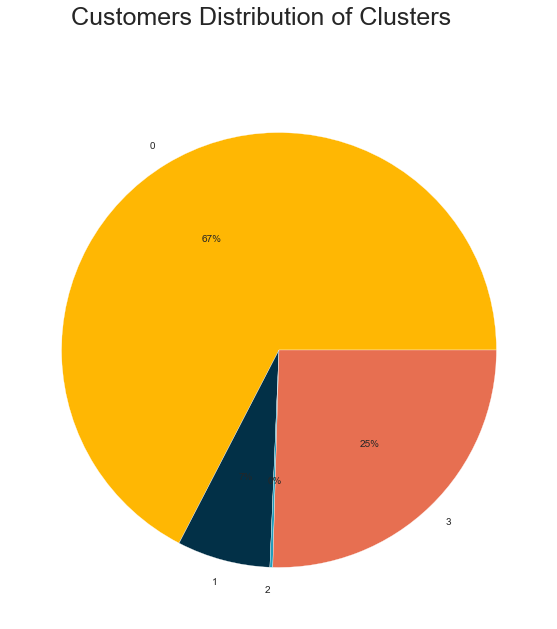

In [91]:
# number of customer in each group 
colors = np.array(["#ffb703", "#023047","#219ebc","#E76F51"]) # choose colors 
rfm_kmeans = rfm_kmeans.reset_index() # remove customer id index 
clusters_count = rfm_kmeans.groupby("labels").agg({"CustomerID": "count"}) # count number of customers in each label
clusters_count.reset_index(inplace=True) 
clusters_count.columns = ['cluster', 'count'] # set columns of the cluster_count

fig  = plt.figure(figsize = (20,10)).suptitle('Customers Distribution of Clusters', fontsize=25) # graph config
plt.pie(clusters_count["count"], labels = clusters_count["cluster"], autopct='%.0f%%', colors=colors) # pie chart init

plt.show() 

<a class="anchor" id="evaluation_metrics_4_1_7"></a>

### 4.1.7 Evaluation metrics  [*](#table_of_content)

In [92]:
print(f'Silhouette Score(n=4): {silhouette_score(rfm_scaled, kmeans.labels_)}')


Silhouette Score(n=4): 0.5822873327086018


In [93]:
print(f'calinski_harabasz_score Score(n=4): {calinski_harabasz_score(rfm_scaled, kmeans.labels_)}')


calinski_harabasz_score Score(n=4): 3342.500843158072


<a class="anchor" id="SOM_self_organizing_map"></a>
## 4.2 SOM (Self-organizing Map)  [*](#table_of_content)

In [555]:
features = rfm_scaled[["recency", "frequency", "monetary"]] # set of features 
data = features.values # convert data to array 

<a class="anchor" id="model_training_4_2_1"></a>
### 4.2.1 Model training  [*](#table_of_content)

```Hyper-parameters tuning```

In [528]:
# This methos is alternative for GirdSearchCV in the supervised machine learning.
som_shape = (1, 4) # map size is 4 
max_iter_arr = [500, 1000, 1500]
sigma_arr = [0.2, 0.4, 0.6, 0.8]
learning_arr = [0.2, 0.4, 0.6, 0.8]
params= []
s_score = []
c_score = []

# This will test all the 48 combintations of different paramters and store the scores inside the arrays 
for i in range(len(max_iter_arr)): # 3 max_iter
    for j in range(len(sigma_arr)): # 4 sigmas 
        for k in range(len(learning_arr)): # 4 learning rates 
            # create the SOM model object 
            som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=sigma_arr[j], learning_rate=learning_arr[k])
            for l in range(max_iter_arr[i]): # Iterate the maximum number of iterations on the map 
                rand_i = np.random.randint(len(data)) #  create random values with equal length of our data
                # update the som mape and choose the winner neuron
                som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter_arr[i]) 
            winner_coordinates = np.array([som.winner(x) for x in data]).T # get winner coordinates 
            cluster_index = np.ravel_multi_index(winner_coordinates, som_shape) # get cluster index
            s = str(max_iter_arr[i]) + ',' + str(sigma_arr[j]) + ',' + str(learning_arr[k]) # cast params as string
            params.append(s) # store params 
            s_score.append(silhouette_score(rfm_scaled, cluster_index)) # store Silheoute score 
            c_score.append(calinski_harabasz_score(rfm_scaled, cluster_index)) # store Calinski score 


In [530]:
# Plot for the Silhouette score for each combination of paramters
fig = px.scatter(y = s_score)
fig.show()

In [531]:
# Plot for the Calinski score for each combination of paramters
fig = px.scatter(y = c_score)
fig.show()

In [563]:
fig = px.scatter(x = c_score, y = s_score, hover_data = [params])
fig.show()

In [564]:
# paramters will be used in our model 
params[33]

'1500,0.2,0.4'

In [556]:
som_shape = (1, 4) # map size is 4 
# SOM machine learning model 
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.2, learning_rate=0.4)

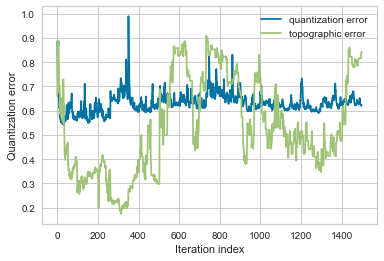

In [557]:
max_iter = 1500
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

<a class="anchor" id="visualization_4_2_2"></a>
### 4.2.2 Visualization  [*](#table_of_content)

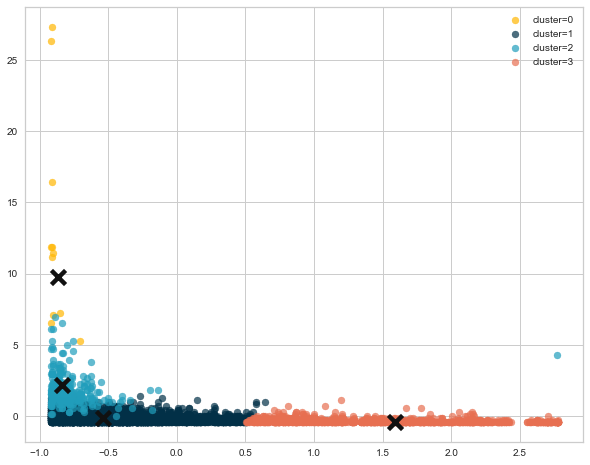

In [558]:
colors = np.array(["#ffb703", "#023047","#219ebc","#E76F51"]) # choose colors 

# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T

# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# Plotting the clusters 
plt.figure(figsize=(10,8))

for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7, c=colors[c])

# Plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=20, color='k') # label='centroid'
    
# plt.title("Clusters of Customers")
# plt.xlabel("Annual Income (k$)")
# plt.ylabel("Spending Score (1-100)")
plt.legend();

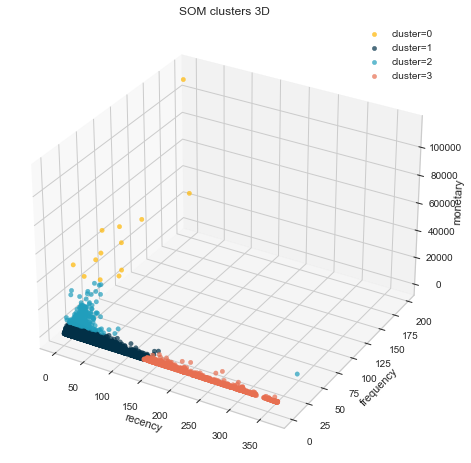

In [559]:
colors = np.array(["#ffb703", "#023047","#219ebc","#E76F51"]) # choose colors 

# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
data = rfm_kmeans[["recency", "frequency", "monetary"]].values
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# Plotting the clusters 
plt.figure(figsize=(10,8))

ax = plt.axes(projection='3d')


for c in np.unique(cluster_index):
    ax.scatter3D(data[cluster_index == c, 0],
                data[cluster_index == c, 1],
                data[cluster_index == c, 2],
                label='cluster='+str(c), alpha=.7, c=colors[c])

# Plotting centroids
# for centroid in som.get_weights():
#     plt.scatter(centroid[:, 0], centroid[:, 1], marker='-', 
#                 s=10, linewidths=20, color='k') # label='centroid'
    
ax.set_title("SOM clusters 3D")
ax.set_xlabel("recency")
ax.set_ylabel("frequency")
ax.set_zlabel("monetary")
plt.legend();

<a class="anchor" id="evaulation_metrics_4_2_3"></a>
### 4.2.3 Evaluation metrics  [*](#table_of_content)

In [560]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=4): {silhouette_score(rfm_scaled, cluster_index)}')


Silhouette Score(n=4): 0.5828045891293435


In [561]:
from sklearn.metrics import calinski_harabasz_score
print(f'Calinski harabasz score(n=4): {calinski_harabasz_score(rfm_scaled, cluster_index)}')


Calinski harabasz score(n=4): 3213.5876414250733


<a class="anchor" id="hierarchical_clustring"></a>
## 4.3 Hierarchical clustring  [*](#table_of_content)

<a class="anchor" id="single_linkage_4_3_1"></a>
### 4.3.1 Signle linkage  [*](#table_of_content)

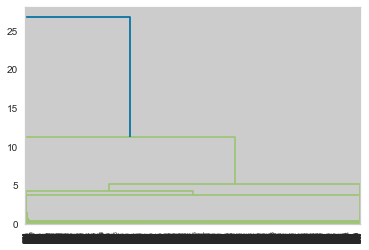

In [590]:
# Single linkage: 
mergings = linkage(rfm_scaled, method="single", metric='euclidean') 
dendrogram(mergings) # draw
plt.show()

<a class="anchor" id="complete_linkage_4_3_2"></a>
### 4.3.2 Complete linkage  [*](#table_of_content)

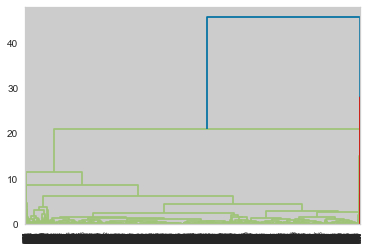

In [603]:
# Complete linkage
mergings = linkage(rfm_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

<a class="anchor" id="average_linkage_4_3_3"></a>
### 4.3.3 Average linkage  [*](#table_of_content)

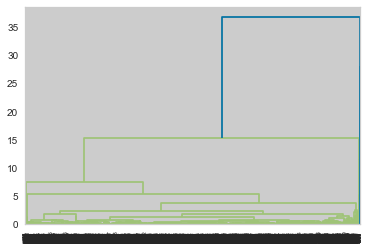

In [639]:
# Average linkage
mergings = linkage(rfm_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [640]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [641]:
cluster_labels.size

4227

In [642]:
# Assign cluster labels
rfm_hr = rfm
rfm_hr['Cluster_Labels'] = cluster_labels


<a class="anchor" id="visualization_4_3_4"></a>
### 4.3.4 Visualization  [*](#table_of_content)

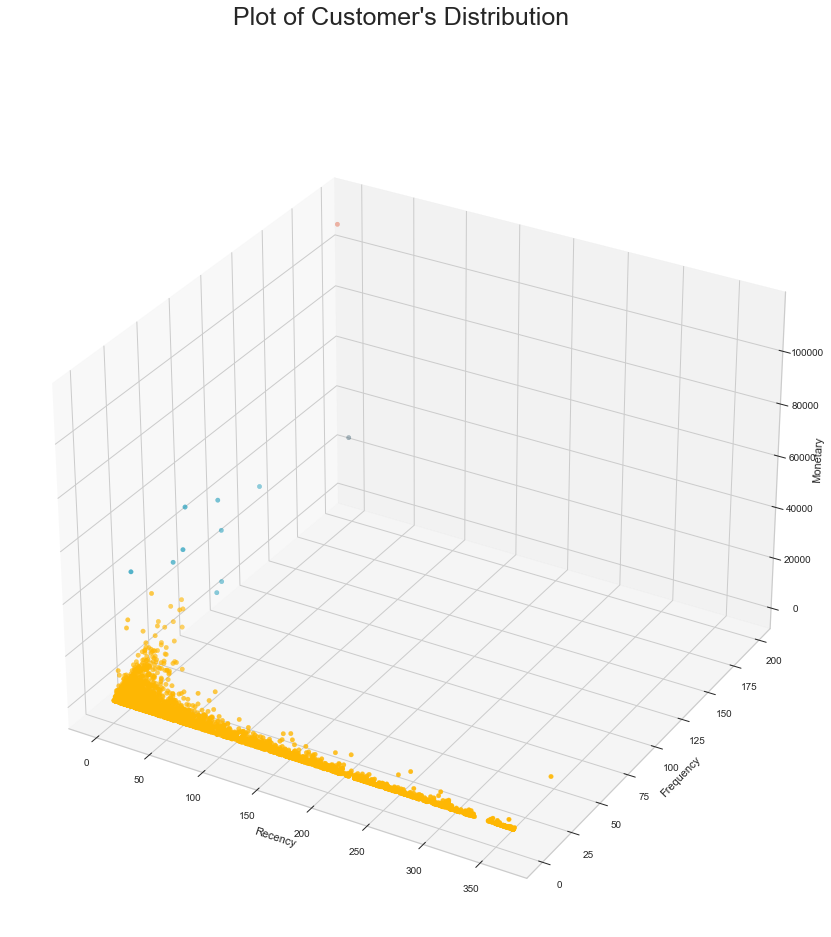

In [643]:
colors = np.array(["#ffb703", "#023047","#219ebc","#E76F51"]) # choose colors 
fig  = plt.figure(figsize = (15,15)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
ax = plt.axes(projection='3d')
ax.scatter3D(rfm_hr["recency"], rfm_hr["frequency"], rfm_hr["monetary"], marker='o', c=colors[rfm_hr["Cluster_Labels"].tolist()])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
# plt.legend()
plt.show()

<a class="anchor" id="evaluation_metrics_4_3_5"></a>
### 4.3.5 Evaluation metrics  [*](#table_of_content)

In [644]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=4): {silhouette_score(rfm_scaled, cluster_labels)}')


Silhouette Score(n=4): 0.8983212344571928


In [645]:
from sklearn.metrics import calinski_harabasz_score
print(f'Calinski harabasz score(n=4): {calinski_harabasz_score(rfm_scaled, cluster_labels)}')


Calinski harabasz score(n=4): 820.7525670071735


```Different linkage types scores```

| | Single | Complete | Average |
| --- | --- | --- | --- |
| Silhouette coefficient | 0.9109273897201983 |  0.8983212344571928 |  0.8983212344571928 |
| Calinski harabasz score | 598.9843956133333 | 820.7525670071735 | 820.7525670071735 |

<a class="anchor" id="theory"></a>
# 5. Theory [*](#table_of_content)

<a class="anchor" id="rfm_5_1"></a>
## 5.1 RFM  [*](#table_of_content)

```RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. The system assigns each customer numerical scores based on these factors to provide an objective analysis. RFM analysis is based on the marketing adage that "80% of your business comes from 20% of your customers."```

1. Recency: How recently a customer has made a purchase
2. Frequency: How often a customer makes a purchase
3. Monetary value: How much money a customer spends on purchases

---------------------------------------------------------------------------------------------------------------------------

<a class="anchor" id="k_means_5_2"></a>
## 5.2 K-means  [*](#table_of_content)

```K-Means is one of the simplest unsupervised clustering algorithm which is used to cluster our data into K number of clusters. The algorithm iteratively assigns the data points to one of the K clusters based on how near the point is to the cluster centroid.```

Assuming we have input data points $x1,x2,x3,…,xn$ and value of $K$ (the number of clusters needed). We follow the below procedure:

1. Pick $K$ points as the initial centroids from the dataset, either randomly or the first $K$.
2. Find the Euclidean distance of each point in the dataset with the identified $K$ points (cluster centroids).
3. Assign each data point to the closest centroid using the distance found in the previous step.
4. Find the new centroid by taking the average of the points in each cluster group.
5. Repeat 2 to 4 for a fixed number of iteration or till the centroids don’t change.

![k_means_gif](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

**Euclidean Distance between two points in space:**

![euclidian_distance.png](https://muthu.co/wp-content/uploads/2018/07/Snip20180707_99.png)

**Assigning each point to the nearest cluster:** <br>
If each cluster centroid is denoted by $c_i$, then each data point $x$ is assigned to a cluster based on

![min_dis](https://muthu.co/wp-content/uploads/2018/07/Snip20180707_100.png)

**Finding the new centroid from the clustered group of points:**


![new_centroid](https://muthu.co/wp-content/uploads/2018/07/Snip20180707_101.png)

```Pros and Cons```

| Pors | Cons |
| --- | --- | 
| High Performance | Result repeatability |
| Easy to Use | Manual “K” |
|Suitable in a large dataset| Scaling with number of dimensions|
|Easy to interpret| Sensitivity to scale |
|| Clustering outliers|
|| Handle numerical data|



---------------------------------------------------------------------------------------------------------------------------

<a class="anchor" id="SOM_5_3"></a>
## 5.3 SOM  [*](#table_of_content)

```Self Organizing Map(SOM) proposed by Teuvo Kohonen is a data visualization technique. It helps to understand high dimensional data by reducing the dimensions of data to a map. And also it showcases clustering by grouping similar data together.
This clustering ability was well received to after a variant of SOM, Growing Self Organizing ma was introduced.```

1. Initialisation
   Weights of neurons in the map layer are initialised.

2. Competitive process
   Select one input sample and search the best matching unit among all neurons in n x m grid using distance measures.

3. Cooperative process
   Find the proximity neurons of BMU by neighbourhood function.

4. Adaptation process
   Update the BMU and neighbours' weights by shifting the values towards the input pattern.
   If the maximum count of training iteration is reached, exit. If not, increment the iteration count by 1 and repeat the process from 2.

![SOM_gif](https://upload.wikimedia.org/wikipedia/commons/3/35/TrainSOM.gif)

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*wm5_lGWsbeF3qxhXB92x-A.png" width="800"/>


**Find the winning point in the map**

$c_t(x) =$ $arg$ $min$ $kx −mk(t)*k^2$ $where$ $k∈{1,...,K}$

**The update formula for a neuron $v$ with weight vector $W_v(s)$ is**

$W_v(s+1) = W_v(s) + θ(u,v,s) * α(s) * (D(t) - Wv(s))$

```Pros and Cons```

| Pors | Cons |
| --- | --- | 
| Complex and Large datasets | It requires necessary and sufficient data |
|| difficult to obtain a perfect mapping|


---------------------------------------------------------------------------------------------------------------------------

<a class="anchor" id="heirarchical_clustring_5_4"></a>
## 5.4 Heirarchical clustring [*](#table_of_content)

```Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.```

![Hr_gif](https://dashee87.github.io/images/hierarch.gif)

![hr_linkage](https://www.researchgate.net/profile/Charlotte-Van-Steen/publication/329208978/figure/fig5/AS:755481513562120@1557132237914/Different-linkage-methods-for-hierarchical-clustering.png)

```Pros and Cons```

| Pors | Cons |
| --- | --- | 
| Easy to use and implement | We can not take a step back |
|Unknown number of clusters| Time complexity is high|
|| It is sensitive to noise and outliers|
|| different distance metrics|


---------------------------------------------------------------------------------------------------------------------------

<a class="anchor" id="evaluation_5_5"></a>
## 5.5 Evaluation metrics  [*](#table_of_content)

<a class="anchor" id=" silhouette_coefficient_5_5_1"></a>
### 5.5.1  silhouette coefficient  [*](#table_of_content)

```The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors: How close the data point is to other points in the cluster How far away the data point is from points in other clusters Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.```

1. Choose initial medoids by using PAM
2. Compute the average silhouette of this initial solution
3. For each pair of a medoid m and a non-medoid x
4. swap m and x
5. compute the average silhouette of the resulting solution
6. remember the best swap
7. un-swap m and x for the next iteration
8. Perform the best swap and return to 3, otherwise stop if no improvement was found.

<img src="https://i.ibb.co/Wt64kL5/s1.png" width="300"/>

<img src="https://i.ibb.co/dpCcCpV/s2.png" width="300"/>

<img src="https://i.ibb.co/L9M3mS2/s3.png" width="300"/>

<a class="anchor" id="calinski_harabasz_score_5_5_2"></a>
### 5.5.2 calinski harabasz score  [*](#table_of_content)

```The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.```

1. Calculate inter-cluster dispersion.
2. Calculate intra-cluster dispersion.
3. Calculate Calinski-Harabasz Index.

![calinski_equations](https://i.ibb.co/LNbj4DD/s4.webp)

# 6. Conclusion  [*](#table_of_content)

| | K-means | SOM | Hierarchical |
| --- | --- | --- | --- |
| Silhouette coefficient | 0.5822873327086018 | 0.5828045891293435 | 0.9120152257124325 |
| Calinski harabasz score |  3342.500843158072 | 3213.5876414250733 | 751.0137151916384 |

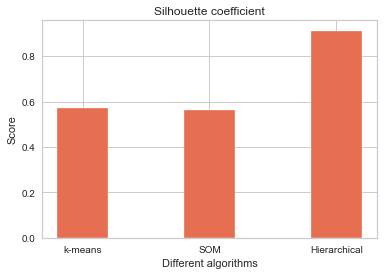

In [646]:
algorithms = ['k-means', 'SOM', 'Hierarchical']
s_y = [0.573141721748004, 0.5611497537929027, 0.9120152257124325]
plt.bar(algorithms, s_y, color ='#E76F51', width = 0.4)

 
plt.xlabel("Different algorithms")
plt.ylabel("Score")
plt.title("Silhouette coefficient")
plt.show()

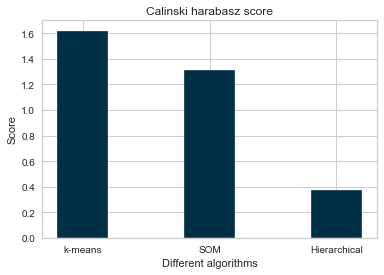

In [647]:
c_y = np.array([3242.7018737778344, 2633.830720922656, 751.0137151916384])
c_y = c_y / 2000
plt.bar(algorithms, c_y, color ='#023047',width = 0.4)
plt.xlabel("Different algorithms")
plt.ylabel("Score")
plt.title("Calinski harabasz score")
plt.show()


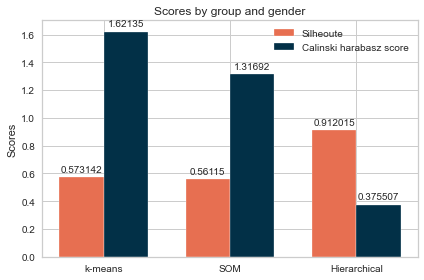

In [648]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(len(algorithms))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, s_y, width, label='Silheoute', color='#E76F51')
rects2 = ax.bar(x + width/2, c_y, width, label='Calinski harabasz score', color='#023047')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, algorithms)
ax.legend()


ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

>In conclusion, Each clustring techniques has its pros and cons and we need to make a trade-off based on our domain need. Based on number of Silhouette metric Heirarchical clustring is the heighst score, but it groups most of the data in one group and one noise value in one group! This is not applicable in our domain and will give useless insights to the salespeople. So, Heirarchical clustring will not be used in our case.To make sure of this decision we have used another metric called Calinski in which Kmeans is higher than the Heirarchical clustring. Kmeans is higher than SOM in both Silhouette and Calinski scores. So, kmeans is the most suitable based on scores and our relation to the domain

---------------------------------------------------------------------------------------------------------------------------